--------------------------
### Loss function in ML
----------------

The __loss function__ is the main theme of modern machine learning; 

> evaluates how well the algorithm models/works for the dataset. 

> If your predictions are totally off, the loss function will output a higher number. 
If they’re pretty good, it’ll output a lower number. 

> As we change pieces of the algorithm to try and improve the model, the loss function will tell us if we’re getting anywhere.

__Example__

| House       | Actual  Rs | Predicted Rs  | Total Loss |
|-------------|------------|---------------|------------|
| RMZ         | 1000       | 1000          |  0         |
| PMC         | 2000       | 2000          |  0         |
| Purva       | 3000       | 3000          |  0         |
|-------------|------------|---------------|------------|
| RMZ         | 1000       |  500          |  500       |
| PMC         | 2000       | 2000          |  0         |
| Purva       | 3000       | 3000          |  0         |
|-------------|------------|---------------|------------|
| RMZ         | 1000       |  500          |  500       |
| PMC         | 2000       | 1500          |  500       |
| Purva       | 3000       | 4000          |  1000      |

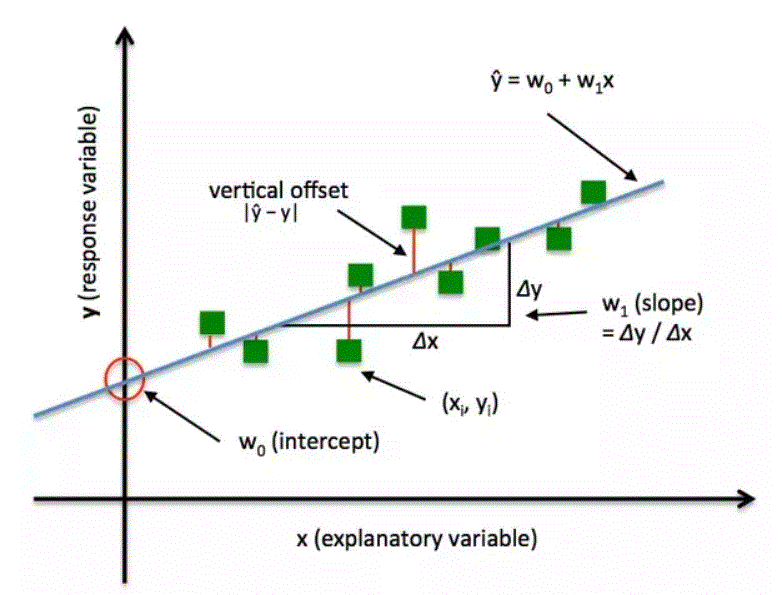

Notice how in the loss function we defined, it doesn’t matter if our predictions were too high or too low. 

All that matters is `how incorrect` (loss) we were, directionally agnostic. 

This is not a feature of all loss functions: in fact, your loss function will vary significantly based on the domain and unique context of the problem that you’re applying machine learning to.




#### A lot of the loss functions that we see implemented in machine learning can get complex and confusing. :-( 

##### popular loss functions - definitions

Loss functions can be broadly categorized into 2 types: 

    - Classification and 
    - Regression Loss.
    
![loss-fn2.GIF](attachment:loss-fn2.GIF)

##### Regression - L1 loss

- also known as 
    - least absolute deviations (LAD)
    - mean absolute error (MAE)
    - least absolute errors (LAE)

L1 Loss function __minimizes the absolute differences between the estimated values and the existing target values__. So, summing up each target </span> value $y_i$ and corresponding estimated value h($x_i$), where $x_i$ denotes the feature set of a single sample, Sum of absolute differences for ‘n’ samples can be calculated as,

$$ \Large \begin{align*}
  & S = \sum_{i=0}^n|y_i - h(x_i)|
\end{align*} $$

![loss-fn2-L1.GIF](attachment:loss-fn2-L1.GIF)

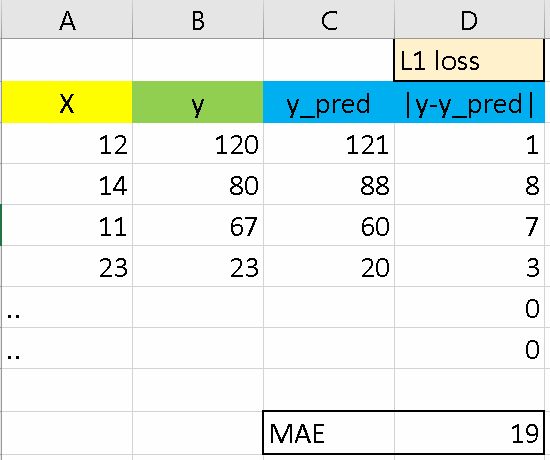

#### Detailed explanation ... below

In [3]:
import numpy as np
import pandas as pd

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.0)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from IPython.display import Image

#### L2 Loss

In [4]:
# function for L2 (MSE)
def MSE(predictions, targets):
    
    mse = []
    for i in np.arange(len(targets)):
        difference         = predictions[i] - targets[i]
        difference_squared = difference ** 2
        
        mse.append(difference_squared)

    return mse

In [5]:
np.arange(-1000, 1000)

array([-1000,  -999,  -998, ...,   997,   998,   999])

In [4]:
# [100] * len(y_pred)

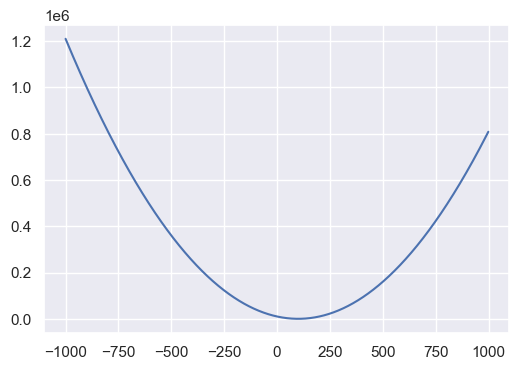

In [6]:
y_pred = np.arange(-1000, 1000)
y_test = [100] * len(y_pred)

mse = MSE(y_pred, y_test)

plt.figure(figsize=(6, 4))
plt.plot(y_pred, mse);

plot of an MSE function where 

    - the true target value is 100, 
    - and the predicted values range between -10,000 to 10,000. 
    
The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.

In [7]:
# MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss

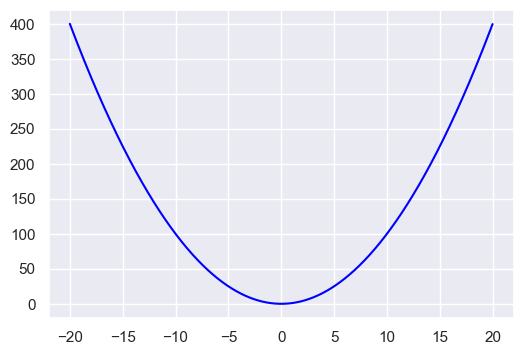

In [9]:
# Plotting
x_vals = np.arange(-20, 20, 0.01)
y_vals = np.square(x_vals)

plt.figure(figsize=(6,4))

plt.plot(x_vals, y_vals, "blue");
#plt.grid(True, which="major")

#### L1 Loss

In [10]:
# function for L1 (MAE)
def MAE(predictions, targets):
    
    mae = []
    for i in range(len(targets)):
        difference         = predictions[i] - targets[i]
        
        mae.append(np.abs(difference))

    return mae

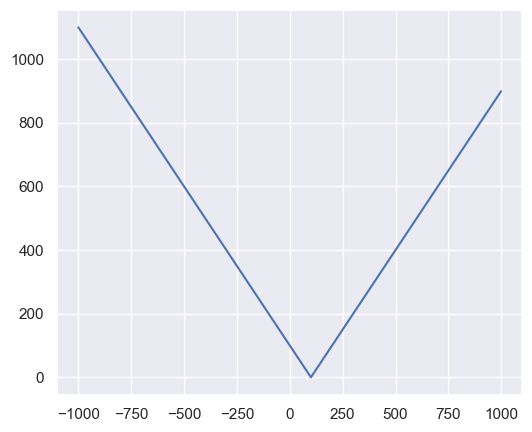

In [11]:
y_pred = np.arange(-1000, 1000)
y_test = [100] * len(y_pred)

mae = MAE(y_pred, y_test)

plt.figure(figsize=(6, 5))
plt.plot(y_pred, mae);

In [12]:
# MAE loss function
def mae_loss(y_pred, y_true):
    abs_error = np.abs(y_pred - y_true)
    sum_abs_error = np.sum(abs_error)
    loss = sum_abs_error / y_true.size
    return loss

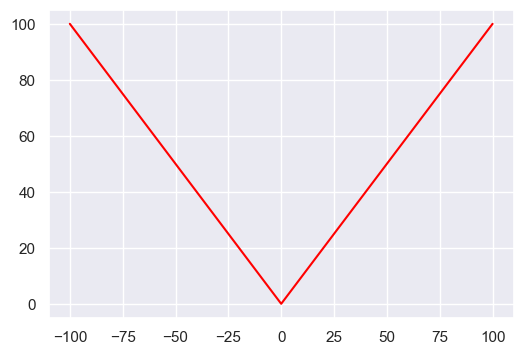

In [14]:
# Plotting
x_vals = np.arange(-100, 100, 0.01)
y_vals = np.abs(x_vals)

plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, "red")
plt.grid(True, which="major")

#### MSE vs. MAE (L2 loss vs L1 loss)

> In machine learning we come across L1 and L2, and there are 2 aspects

    > 1) L1-loss function vs L2-loss function 
    
    > 2) L1-regularization vs L2-regularization (norms)

#### 1. Key point - L2/MSE is sensitive to outliers

- MSE is sensitive to outliers (MAE is not)
- both functions reach the minimum when the prediction is exactly equal to the true value.
- One ** big problem ** in using MAE loss (for neural nets especially) is 
    - its gradient is the same throughout, 
        - which means the gradient will be large even for small loss values. 
        - This isn’t good for learning. 
            - To fix this, we can use dynamic learning rate which decreases as we move closer to the minima. 
    - MSE behaves nicely in this case and will converge even with a fixed learning rate. 
    - The gradient of MSE loss is high for larger loss values and decreases as loss approaches 0, making it more precise at the end of training 
    
    
> L1 loss is more robust to outliers, but its derivatives are not continuous, making it inefficient to find the solution. 

> L2 loss is sensitive to outliers, but gives a more stable and closed form solution (by setting its derivative to 0.)



### Key point - problem in using MAE loss (for neural nets especially) is that its gradient is the same throughout

which means the gradient will be large even for small loss values. This isn’t good for learning. To fix this, we can use dynamic learning rate which decreases as we move closer to the minima. MSE behaves nicely in this case and will converge even with a fixed learning rate. The gradient of MSE loss is high for larger loss values and decreases as loss approaches 0, making it more precise at the end of training

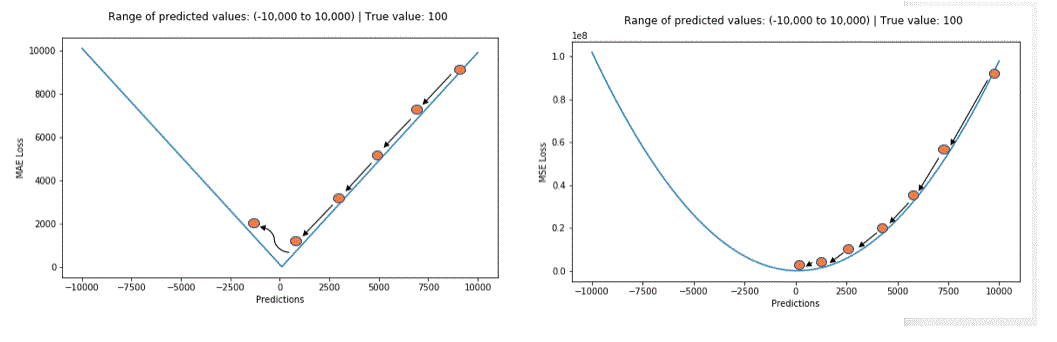

Comparison (L1 vs L2)
----------

| L1 Loss function            | L2 Loss function   | 
|------------------------     |------------------  |
| Robust to outliers          | Sensitive          | 
| Unstable solution           | Stable solution    | 
| Possibly multiple solutions | Always 1 solution  | 

Robustness, per wikipedia, is explained as:
--------

> The method of least absolute deviations finds applications in many areas, due to its __robustness__ compared to the least squares method. Least absolute deviations is robust in that it is __resistant to outliers__ in the data. This may be helpful in studies where outliers may be safely and effectively ignored. If it is important to pay attention to any and all outliers, the method of least squares is a better choice.

Stability, per wikipedia, is explained as:
---------

> The instability property of the method of least absolute deviations means that, for a small horizontal adjustment of a datum, the regression line may jump a large amount. The method has continuous solutions for some data configurations; however, by moving a datum a small amount, one could “jump past” a configuration which has multiple solutions that span a region. After passing this region of solutions, the least absolute deviations line has a slope that may differ greatly from that of the previous line. 

> In contrast, the least squares solutions is stable in that, for any small adjustment of a data point, the regression line will always move only slightly; that is, the regression parameters are continuous functions of the data.